# Linear Regression with Batch Gradient Descent

You will train your model using a real world dataset.  The dataset contains a collection of real estate listings in San Luis Obispo county.

https://wiki.csc.calpoly.edu/datasets/wiki/Houses

To make it simpler for this assignment, the dataset has been slightly modified.  It contains the following fields:

1.	MLS: Multiple listing service number for the house (unique ID).
2.	Price: the most recent listing price of the house (in dollars).
3.	Bedrooms: number of bedrooms.
4.	Bathrooms: number of bathrooms.
5.	Size: size of the house in square feet.
6.	Price/SQ.ft: price of the house per square foot.

The model predict the housing price given the square footage of the house.


In [ ]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive',force_remount=True)

# read in the housing price data from a CSV file
# and store it as a pandas DataFrame object
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HW5/housing_price_data.csv")

df.head() # display the first few rows of the DataFrame to check that the data was read in correctly

Mounted at /content/drive


,MPLS,Price,Bedrooms,Bathrooms,Size,PriceSq
0,132842,795000,3,3,2371,335.30
1,134364,399000,4,3,2818,141.59
2,135141,545000,4,3,3032,179.75
3,135712,909000,4,4,3540,256.78
4,136282,109900,3,1,1249,87.99


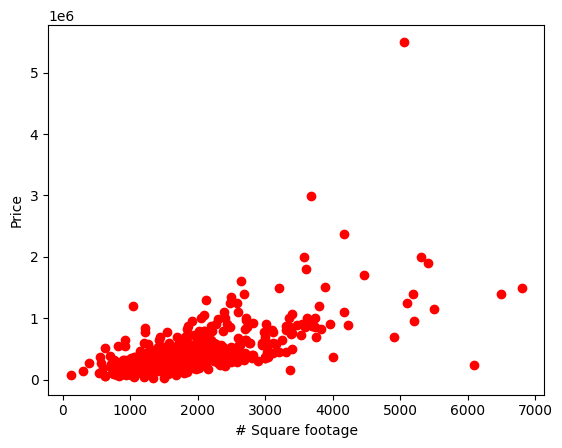

In [ ]:
# Plot data points
X, y = (df["Size"].values,df["Price"].values)  # extract the Size and Price columns from the DataFrame
                                             # and store them as separate NumPy arrays
X = X.reshape(len(X),1)  # reshape the Size array into a 2D array with a single column
y = y.reshape(len(y),1)  # reshape the Price array into a 2D array with a single column

# plots the data points
plt.plot(X, y, 'ro')  # plot the data points as red circles
plt.xlabel("# Square footage")  # set the x-axis label
plt.ylabel("Price")  # set the y-axis label
plt.show()  # display the plot

In [ ]:
max_min = X.max(0) - X.min(0)  # calculate the difference between the maximum and minimum values of X
                               # for each column (i.e., for each feature)
Xmin = X.min(0)  # calculate the minimum value of X for each column
X = (X-Xmin) / max_min  # subtract the minimum value from each element of X and divide the result
                        # by the range (i.e., the difference between the maximum and minimum values)
                        # to normalize the data to a range of [0, 1]

# Add bias
z=np.ones((len(X),1))  # create a column vector of ones with the same number of rows as X
                       # to use as the bias term
X = X.reshape(len(X),1)  # reshape X into a 2D array with a single column
X = np.concatenate((z,X), axis=1)  # concatenate the column vector of ones with the normalized X values
                                    # along the column axis to create the final feature matrix
y = y.reshape(len(X),1)  # reshape y into a 2D array with a single column

# sort for testing/plotting
Xsort = np.sort(X, axis=0)  # sort the feature matrix in ascending order along the row axis
                            # (i.e., sort by the first column, which contains the bias term)

print(X.shape)  # print the shape of X to check that it has the expected dimensions
print(y.shape)  # print the shape of y to check that it has the expected dimensions

# For non-vectorized
X_train = X[:,1]  # extract the second column of X (i.e., the normalized house size values)
                  # and store it as a separate 1D array
y_train = y  # store y as-is


(781, 2)
(781, 1)


## Perform gradient descent

In [ ]:
from os import wait3
# Initialize vector w
np.random.seed(20)
w = np.random.rand(2,1)
print(w)
w0 = w[0]
w1 = w[1]

# Learning rate
alpha = 0.0003

# Number of epochs
MAX_EPOCHS = 2000

# Initalize the sum of sqaured error (SSE) array
sse_array = []

# Loop for 2000 epochs
for itr in range (0, MAX_EPOCHS):
    # X_train is 781x1 and y_train is 781x1
    X_train = X_train.reshape(781,1)
    y_train = y_train.reshape(781,1)


    y_hat = np.add(np.multiply(X_train,w1),w0)

    dw0 = 2*np.sum(y_hat - y_train)
    dw1 = 2*np.sum((y_hat - y_train)*X_train)

    w0 = w0 - (alpha * dw0)
    w1 = w1 - (alpha * dw1)

    sse = np.sum(np.square(y_hat - y_train))

    # Store SSE results for the plot
    sse_array.append(sse)

# If non-vectorized, then need to form w
w = np.array([w0,w1])

[[0.5881308 ]
 [0.89771373]]


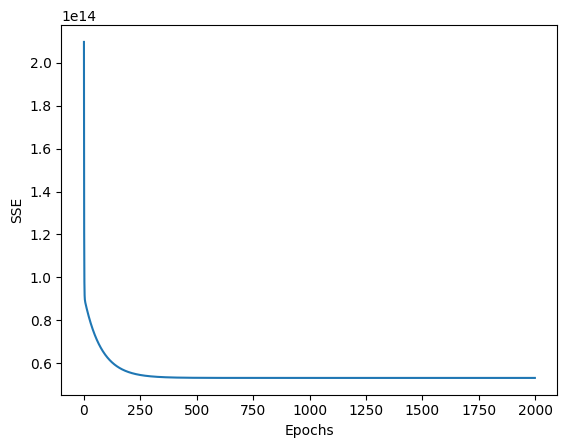

In [ ]:
### Plot sse vs iterations
plt.plot(sse_array)  #
plt.xlabel("Epochs")
plt.ylabel("SSE")
plt.show()

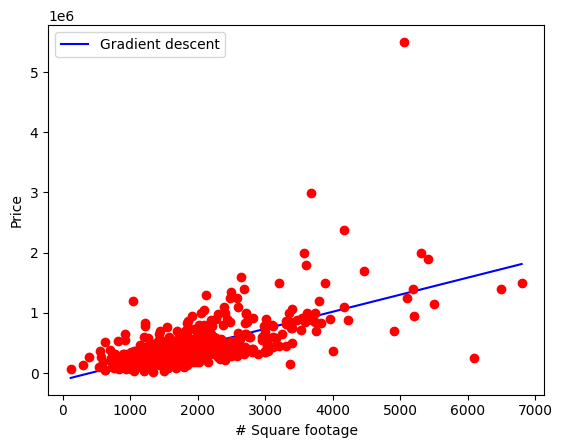

In [ ]:
### Plot the fitted curve

# Predict the house prices using the learned model
yhat = np.dot(np.sort(X, axis=0),w)
# Plot the predicted curve with the learned parameters using Gradient Descent
plt.plot(Xsort[:,1] * max_min + Xmin, yhat, 'b', label="Gradient descent")

# Plot the original data points
plt.plot(X[:,1] * max_min + Xmin, y, 'ro')

# Add a legend to the plot
plt.legend()

# Add labels to the x and y axis
plt.xlabel("# Square footage")
plt.ylabel("Price")

plt.show()

In [ ]:
### Print the weight vector w
print (w)

[[ -79538.27526362]
 [1891035.36605185]]


In [ ]:
size = 4000
normalized_size = (size-Xmin) / max_min
print(w[0] + (w[1] * normalized_size))



[1018847.53615571]
